In [1]:
import h5py
import numpy as np
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('classic')
%matplotlib inline

import converter
from importlib import reload
reload(converter)

import utils
reload(utils)

<module 'utils' from '/home/ray/git-projects/RKLM_Reference/visualiser_debugger/utils.py'>

In [2]:
#####################################################
#
# Time labels for C and Python
#
def get_time(t_label, tag):
    label = '%.3d_%s' %(t_label,tag)
    return label
#
#####################################################

#####################################################
#
# C-output folder names
#
base_suffix = '_rising_bubble/'
# 
#####################################################
#
# and its filename
#
# py_filename = "output_acoustic_wave_high_low_mach_gravity_comp.h5"
# py_filename = "output_internal_long_wave_low_mach_gravity_comp.h5"
# py_filename = "output_travelling_vortex_3d_48_low_mach_gravity_comp.h5"

#####################################################

figsize_tuple = (12,3)

In [3]:
base_folder_name = "../RKLM_Reference/output"

base_path = base_folder_name + base_suffix
folder_comp = "low_Mach_gravity_comp/"
folder_psinc = "low_Mach_gravity_psinc/"

# Manually list the folder names for each directory
directories = ['rho']
directories += ['S']
directories += ['T']
directories += ['Y']
directories += ['buoy']
directories += ['dT'] 
directories += ['dY']
directories += ['dp2_c']
directories += ['dp2_nodes']
directories += ['dpdim']
directories += ['drhoY'] 
directories += ['p']
directories += ['p2_c']
directories += ['p2_nodes']
directories += ['u']
directories += ['v']
directories += ['w']
directories += ['vortz']
directories += ['rhoY']
directories += ['rhoe']
directories += ['rhou']
directories += ['rhov']
directories += ['rhow']
directories += ['rhs']
directories += ['buoy']
# if tag == 'before_advect':
#     directories += ['rhoYu', 'rhoYv']
# if tag == 'after_ebnaimp' or tag == 'after_full_step':
#     directories += ['wplusx', 'wplusy', 'wplusz', 'hcenter', 'rhs_nodes', 'p2_full']
    
# And manually list the file names.
filenames = ['rho']
filenames += ['S'] 
filenames += ['T']
filenames += ['Y']
filenames += ['buoy']
filenames += ['dT']
filenames += ['dY']
filenames += ['dp2_c']
filenames += ['dp2_n']
filenames += ['dpdim']
filenames += ['drhoY'] 
filenames += ['p']
filenames += ['p2_c']
filenames += ['p2_n']
filenames += ['u']
filenames += ['v']
filenames += ['w']
filenames += ['vortz']
filenames += ['rhoY']
filenames += ['rhoe']
filenames += ['rhou']
filenames += ['rhov']
filenames += ['rhow']
filenames += ['rhs']
filenames += ['buoy']
# if tag == 'before_advect':
#     filenames += ['rhoYu', 'rhoYv']
# if tag == 'after_ebnaimp' or tag == 'after_full_step':
#     filenames += ['wplusx', 'wplusy', 'wplusz', 'hcenter', 'rhs_nodes', 'p2_full']

In [4]:
# manually specific folder names
test_cases_folders = ['p2_nodes']
test_cases_folders += ['rho']
test_cases_folders += ['rhoY']
test_cases_folders += ['rhoe']
test_cases_folders += ['rhou']
test_cases_folders += ['rhov']
test_cases_folders += ['rhow']
test_cases_folders += ['u']
test_cases_folders += ['v']
test_cases_folders += ['vortz']
test_cases_folders += ['dT'] 
test_cases_folders += ['Y']
test_cases_folders += ['dY']
test_cases_folders += ['buoy']
# if tag == 'before_advect':
#     test_cases_folders += ['rhoYu', 'rhoYv']
# if tag == 'after_ebnaimp' or tag == 'after_full_step':
#     test_cases_folders += ['wplusx', 'wplusy', 'wplusz', 'hcenter', 'rhs_nodes', 'p2_full']

# and filenames
test_cases_names = ['p2_n']
test_cases_names += ['rho']
test_cases_names += ['rhoY']
test_cases_names += ['rhoe']
test_cases_names += ['rhou']
test_cases_names += ['rhov']
test_cases_names += ['rhow']
test_cases_names += ['u']
test_cases_names += ['v']
test_cases_names += ['vortz']
test_cases_names += ['dT']
test_cases_names += ['Y']
test_cases_names += ['dY']
test_cases_names += ['buoy']
# if tag == 'before_advect':
#     test_cases_names += ['rhoYu', 'rhoYv']
# if tag == 'after_ebnaimp' or tag == 'after_full_step':
#     test_cases_names += ['wplusx', 'wplusy', 'wplusz', 'hcenter', 'rhs_nodes', 'p2_full']

../RKLM_Reference/output_rising_bubble/
../output_rising_bubble/output_rising_bubble_ensemble=1_160_80_10.0_comp_debug.h5


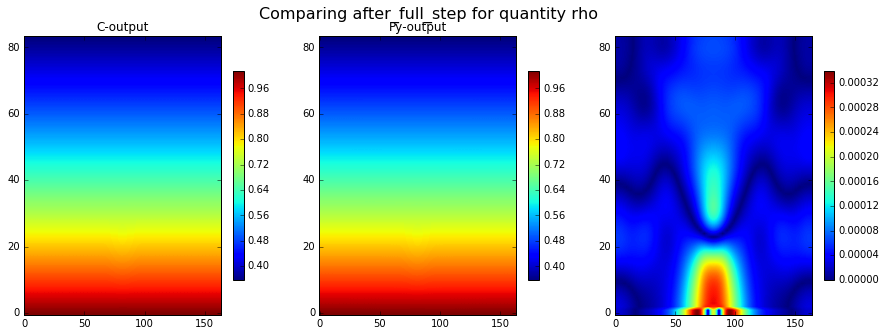

(84, 164) (84, 164)


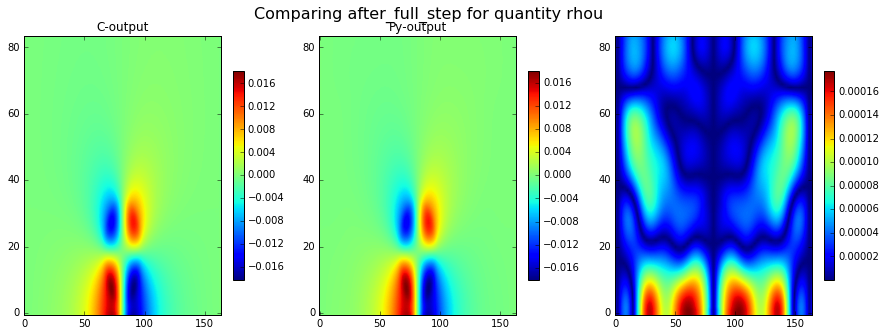

(84, 164) (84, 164)


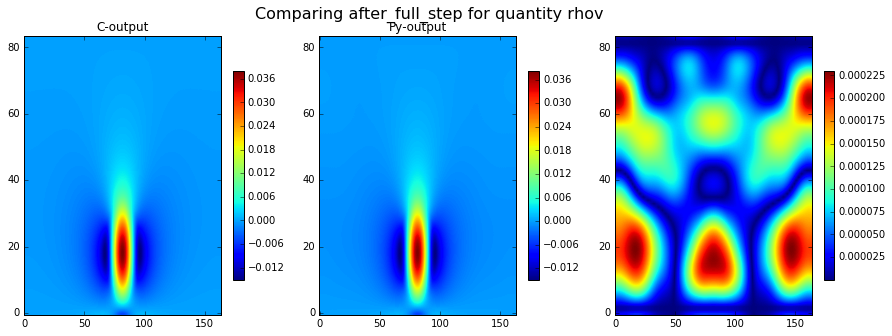

(84, 164) (84, 164)


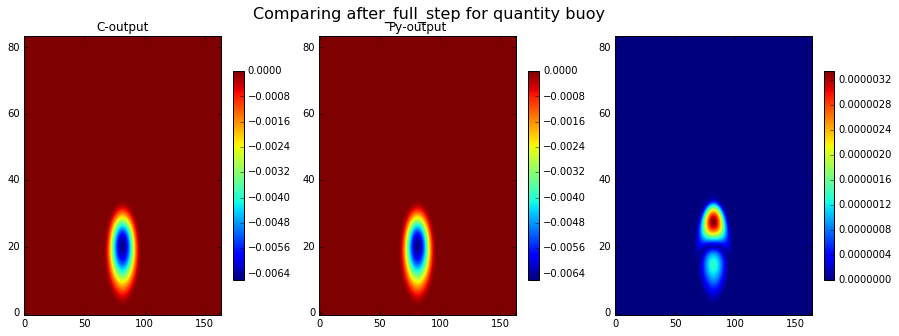

(84, 164) (84, 164)


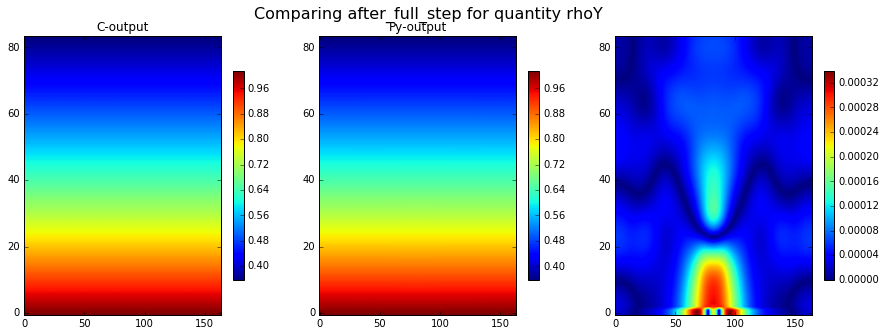

(84, 164) (84, 164)


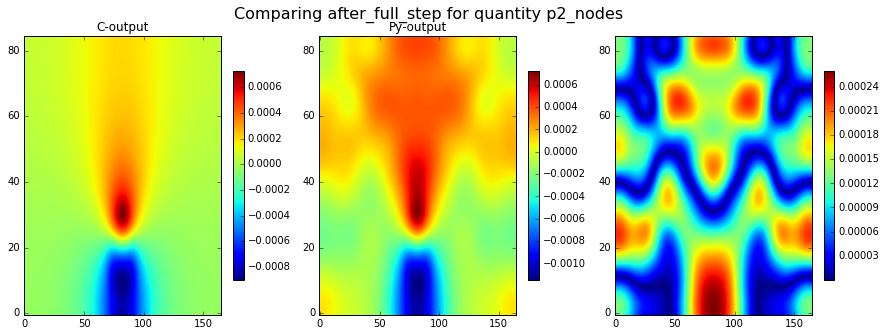

(85, 165) (85, 165)


In [40]:
tt = 79
t_label = '%.3d' %tt

# tag = 'ic'
# tag = 'before_advect'
# tag = 'after_advect'
# tag = 'after_ebnaexp'
# tag = 'after_ebnaimp'
# tag = 'after_half_step'
# tag = 'after_efna'
# tag = 'after_full_advect'
# tag = 'after_full_ebnaexp'
tag = 'after_full_step'

time = get_time(tt, tag)

print(base_path)
converter_obj = converter.convert(base_path,folder_psinc,time,t_label)
converter_obj.convert_files(directories,filenames)
c = converter_obj.get_converted_files(test_cases_folders, test_cases_names)

py_basename = "output_rising_bubble"
py_directory = "../%s/" %py_basename

ens_size = 1
grid_x = 160
grid_y = 80
end_time = 10.0
suffix = "comp_debug"

tc = utils.test_case(py_basename,py_directory,grid_x,grid_y,end_time)
filename = tc.get_filename(ens_size,suffix)
path = tc.get_path(filename)

i2 = tc.i2

print(path)

attributes = ['rho', 'rhou', 'rhov', 'buoy', 'rhoY', 'p2_nodes']

output_image = True

py_nodes = True
c_nodes = True
n2e = (slice(0,-1),slice(0,-1),slice(0,-1))

for attribute in attributes:
    py_arr = tc.get_arr(path, tt, ens_size, attribute, tag=tag, label_type='STEP')
    if py_nodes == True and c_nodes == False: py_arr = py_arr[n2e]


    c_arr = getattr(c,attribute)[:]
    c_im = c_arr.T#[:5,:]#[i2]
    py_im = py_arr.T#[:5,:]#[i2]

    fig, ax = plt.subplots(ncols=3, figsize=(15,5))
    im0 = ax[0].imshow(c_im, origin='lower',aspect='auto')
    ax[0].set_title("C-output")
    im1 = ax[1].imshow(py_im, origin='lower', aspect='auto')
    fig.colorbar(im0,ax=ax[0],shrink=.75)
    ax[1].set_title("Py-output")
    fig.colorbar(im1,ax=ax[1],shrink=.75)
    diff_arr = np.abs(c_im - py_im)
    im2 = ax[2].imshow(diff_arr, origin='lower', aspect='auto')
    #     print(diff_arr.max())
    # ax[2].set_title("abs. diff. between outputs")
    fig.colorbar(im2,ax=ax[2],shrink=.75)
    fig.suptitle(r'Comparing %s for quantity %s' %(tag,attribute), fontsize='16')
    plt.show()
    
    print(c_im.shape, py_im.shape)


In [48]:
print('%.3d_%s' %(0,'hey!'))

000_hey!
